<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/FinalCatsDogs(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image 
import numpy as np
import os,sys
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Resize images to (300,300)**

In [ ]:
path= '/content/drive/MyDrive/Dataanimals'
for filename in glob.iglob(path + '**/*.jpg', recursive=True):
    im = Image.open(filename)
    imResize = im.resize((64,64), Image.ANTIALIAS)
    print(filename)
    imResize.save(filename,)

/content/drive/MyDrive/Dataanimals/dog.4036.jpg
/content/drive/MyDrive/Dataanimals/dog.4016.jpg
/content/drive/MyDrive/Dataanimals/dog.4024.jpg
/content/drive/MyDrive/Dataanimals/dog.4034.jpg
/content/drive/MyDrive/Dataanimals/dog.4015.jpg
/content/drive/MyDrive/Dataanimals/dog.4006.jpg
/content/drive/MyDrive/Dataanimals/dog.4017.jpg
/content/drive/MyDrive/Dataanimals/dog.4025.jpg
/content/drive/MyDrive/Dataanimals/dog.4035.jpg
/content/drive/MyDrive/Dataanimals/dog.4013.jpg
/content/drive/MyDrive/Dataanimals/dog.4005.jpg
/content/drive/MyDrive/Dataanimals/dog.4028.jpg
/content/drive/MyDrive/Dataanimals/dog.4027.jpg
/content/drive/MyDrive/Dataanimals/dog.4012.jpg
/content/drive/MyDrive/Dataanimals/dog.4001.jpg
/content/drive/MyDrive/Dataanimals/dog.4014.jpg
/content/drive/MyDrive/Dataanimals/dog.4023.jpg
/content/drive/MyDrive/Dataanimals/dog.4002.jpg
/content/drive/MyDrive/Dataanimals/dog.4026.jpg
/content/drive/MyDrive/Dataanimals/dog.4003.jpg
/content/drive/MyDrive/Dataanimals/dog.4

Populating the interactive namespace from numpy and matplotlib


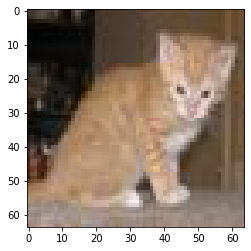

(64, 64, 3)

In [ ]:
%pylab inline
img = mpimg.imread('/content/drive/MyDrive/Dataanimals/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()
img.shape

In [ ]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Put in dataframe images and the label, 1 for dogs and 0 for cats **

In [ ]:
filepath = os.listdir(r"/content/drive/MyDrive/Dataanimals/")
directory = "/content/drive/MyDrive/Dataanimals"
import tqdm
x=[]
y= []
for i in filepath:
  category=i.split('.')[0]
  if category=='dog':
      y.append(1)
  else:
      y.append(0)
  img = mpimg.imread(os.path.join(directory,i))
  x.append(img)
df=pd.DataFrame({
    'file':filepath,
    'categ':y
})

In [ ]:
print(df)

            file  categ
0   dog.4036.jpg      1
1   dog.4016.jpg      1
2   dog.4024.jpg      1
3   dog.4034.jpg      1
4   dog.4015.jpg      1
5   dog.4006.jpg      1
6   dog.4017.jpg      1
7   dog.4025.jpg      1
8   dog.4035.jpg      1
9   dog.4013.jpg      1
10  dog.4005.jpg      1
11  dog.4028.jpg      1
12  dog.4027.jpg      1
13  dog.4012.jpg      1
14  dog.4001.jpg      1
15  dog.4014.jpg      1
16  dog.4023.jpg      1
17  dog.4002.jpg      1
18  dog.4026.jpg      1
19  dog.4003.jpg      1
20  dog.4004.jpg      1
21  dog.4039.jpg      1
22  dog.4038.jpg      1
23  dog.4049.jpg      1
24  dog.4037.jpg      1
25  dog.4048.jpg      1
26  dog.4050.jpg      1
27  dog.4046.jpg      1
28  dog.4047.jpg      1
29  cat.4034.jpg      0
30  dog.4045.jpg      1
31  cat.4047.jpg      0
32  cat.4016.jpg      0
33  cat.4002.jpg      0
34  cat.4026.jpg      0
35  cat.4046.jpg      0
36  cat.4035.jpg      0
37  cat.4039.jpg      0
38  cat.4045.jpg      0
39  cat.4048.jpg      0
40  cat.4005.jpg

In [ ]:
print(np.array(x).shape)
print(np.array(y).shape)

(60, 64, 64, 3)
(60,)


**Data augmentation **

In [ ]:

data_augmentation = tf.keras.Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),
])
img=[]
lbl = []
for i in range(len(x)) :
  image = tf.cast(tf.expand_dims(x[i]/255, 0), tf.float32)
  for j in range(9):
    augmented_image = data_augmentation(image)
    img.append(augmented_image[0])
    
  

In [ ]:
print(np.array(img).shape)
y1=np.repeat(range(2),270)
print(np.array(y1).shape)

(540, 64, 64, 3)
(540,)


**Split the data to 2/3 train and 1/3 test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img,y1 ,test_size= 0.33)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import losses
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(30,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_train = tf.stack(x_train)
y_train = tf.stack(y_train)


In [ ]:
classifier.fit(x_train,y_train, epochs=50 ,batch_size=32 )

Epoch 1/50
12/12 [==============================] - 0s 19ms/step - loss: 0.4930 - accuracy: 0.8144
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4864 - accuracy: 0.7950
Epoch 3/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4564 - accuracy: 0.8116
Epoch 4/50
12/12 [==============================] - 0s 19ms/step - loss: 0.5444 - accuracy: 0.7008
Epoch 5/50
12/12 [==============================] - 0s 20ms/step - loss: 0.4808 - accuracy: 0.8033
Epoch 6/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4726 - accuracy: 0.7784
Epoch 7/50
12/12 [==============================] - 0s 19ms/step - loss: 0.4572 - accuracy: 0.7922
Epoch 8/50
12/12 [==============================] - 0s 25ms/step - loss: 0.4734 - accuracy: 0.7673
Epoch 9/50
12/12 [==============================] - 0s 19ms/step - loss: 0.4722 - accuracy: 0.7645
Epoch 10/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4431 - accuracy: 0.8033
Epoch 11/

In [ ]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 30)               

In [ ]:
classifier.save("model1_catsVSdogs_10epoch.h5")

In [ ]:
from keras.models import load_model
filename='/content/drive/MyDrive/Dataanimals/cat.4046.jpg'
def prob(pred):
  if pred>0.5 :
    pred=1
  else:
    pred=0
  return pred
def classify(file):
        model = load_model('model1_catsVSdogs_10epoch.h5')
        #dictionary to label all traffic signs class.
        classes = { 
        1:'its a cat',
        0:'its a dog',
 
        }
        global label_packed
        image = Image.open(file)
        image = image.resize((64,64))
        image = np.expand_dims(image, axis=0)
        image = np.array(image)
        image = image/255
        pred = model.predict([image])[0]
        classes_x=prob(pred[0])
        sign = classes[classes_x]
        print(sign)
 
       
        return sign

classify(filename)

1/1 [==============================] - 0s 65ms/step
its a cat


1